In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 

In [18]:
# Extract all the zip files before start to read the CSV files.
data_acel = pd.read_csv('Linear Acceleration_1.csv')
data_velang = pd.read_csv('Gyroscope_1.csv')
data_rotulos = pd.read_csv('Labeled_events_1.csv')

data_acel2 = pd.read_csv('Linear Acceleration_2.csv')
data_velang2 = pd.read_csv('Gyroscope_2.csv')
data_rotulos2 = pd.read_csv('Labeled_events_2.csv')

data_acel3= pd.read_csv('Linear Acceleration_3.csv')
data_velang3 = pd.read_csv('Gyroscope_3.csv')
data_rotulos3 = pd.read_csv('Labeled_events_3.csv')

In [19]:
data_velang.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.102243,-0.005973,-0.003326,0.001331
1,0.104737,0.000027,-0.006326,0.008331
2,0.107237,0.001027,0.001674,0.000331
3,0.109732,0.000027,0.001674,-0.001669
4,0.112232,0.001027,-0.002326,0.001331


In [20]:
print(np.where(data_rotulos['target']==2)) 
print(np.where(data_rotulos2['target']==2))
print(np.where(data_rotulos3['target']==2))

(array([ 1, 12, 13, 17, 18, 31, 32, 33, 34, 38, 42, 47, 48, 54, 63, 64, 70,
       72], dtype=int64),)
(array([ 1,  3, 10, 11, 35], dtype=int64),)
(array([], dtype=int64),)


In [21]:
#12#10#4 = 26 eventos não agressivos
#11#8#6 = 25 curva agressiva a direita
#18#5#0 = 23 curva agressiva a esquerda
#5#6#18 = 29 troca de faixa a direita
#15#7#0 = 22 freada agressiva
#9#6#6 = 21 aceleração agressiva
#3#4#16 = 23 troca de faixa a esquerda

#169 amostras eventos de direção

In [22]:
#Segmenta dados dos 16 eventos obsevados de aceleração linear

length1 = len(data_rotulos)

eventsgt1 = {}
giro_eventsgt1 = {}
#eventos 1º data set 
for i in np.arange(0,length1):
    eventsgt1[i] = pd.DataFrame()
    giro_eventsgt1[i] = pd.DataFrame()
    eventsgt1[i] = eventsgt1[i].append(data_acel[data_acel['Time (s)'].between(data_rotulos['inicio'][i], data_rotulos['fim'][i], inclusive=True)], ignore_index=True)
    giro_eventsgt1[i] = giro_eventsgt1[i].append(data_velang[data_velang['Time (s)'].between(data_rotulos['inicio'][i], data_rotulos['fim'][i], inclusive=True)], ignore_index=True)

length2 = len(data_rotulos2)

eventsgt2 = {}
giro_eventsgt2 = {}
#eventos 1º data set 
for i in np.arange(0,length2):
    eventsgt2[i] = pd.DataFrame()
    giro_eventsgt2[i] = pd.DataFrame()
    eventsgt2[i] = eventsgt2[i].append(data_acel2[data_acel2['Time (s)'].between(data_rotulos2['inicio'][i], data_rotulos2['fim'][i], inclusive=True)], ignore_index=True)
    giro_eventsgt2[i] = giro_eventsgt2[i].append(data_velang2[data_velang2['Time (s)'].between(data_rotulos2['inicio'][i], data_rotulos2['fim'][i], inclusive=True)], ignore_index=True)

length3 = len(data_rotulos3)
    
eventsgt3 = {}
giro_eventsgt3 = {}
#eventos 1º data set 
for i in np.arange(0,length3):
    eventsgt3[i] = pd.DataFrame()
    giro_eventsgt3[i] = pd.DataFrame()
    eventsgt3[i] = eventsgt3[i].append(data_acel3[data_acel3['Time (s)'].between(data_rotulos3['inicio'][i], data_rotulos3['fim'][i], inclusive=True)], ignore_index=True)
    giro_eventsgt3[i] = giro_eventsgt3[i].append(data_velang3[data_velang3['Time (s)'].between(data_rotulos3['inicio'][i], data_rotulos3['fim'][i], inclusive=True)], ignore_index=True)
    

C:\Users\wesle\AppData\Local\Temp/ipykernel_9872/3172260651.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  eventsgt1[i] = eventsgt1[i].append(data_acel[data_acel['Time (s)'].between(data_rotulos['inicio'][i], data_rotulos['fim'][i], inclusive=True)], ignore_index=True)
C:\Users\wesle\AppData\Local\Temp/ipykernel_9872/3172260651.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  giro_eventsgt1[i] = giro_eventsgt1[i].append(data_velang[data_velang['Time (s)'].between(data_rotulos['inicio'][i], data_rotulos['fim'][i], inclusive=True)], ignore_index=True)
C:\Users\wesle\AppData\Local\Temp/ipykernel_9872/3172260651.py:22: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  eventsgt2[i] = eventsgt2[i].append(data_acel2[data_acel2['Time (s)'].between(data_rotulos2['inicio'][i], data_rotulos2['fim'][i], inclu

In [23]:
giro_eventsgt1[0].head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,34.657057,0.033972,0.016903,-0.023751
1,34.659551,0.034972,0.006903,-0.025751
2,34.662052,0.032972,0.006903,-0.027751
3,34.664546,0.031972,0.016903,-0.025751
4,34.667047,0.035972,0.020903,-0.021751


In [24]:
#Dados de aceleração linear e velocidade angular dos eventos de todos os datasets

accel1_x = {};accel1_y = {};accel1_z = {}
giro1_z = {}; giro1_x = {}; giro1_y = {}; 
length_data1 = {};
for i in np.arange(0,length1):
    accel1_x[i] = eventsgt1[i]['Linear Acceleration y (m/s^2)']
    accel1_y[i] = eventsgt1[i]['Linear Acceleration x (m/s^2)']*-1
    accel1_z[i] = eventsgt1[i]['Linear Acceleration z (m/s^2)']*-1
    giro1_x[i] = giro_eventsgt1[i]['Gyroscope y (rad/s)']
    giro1_y[i] = giro_eventsgt1[i]['Gyroscope x (rad/s)']*-1
    giro1_z[i] = giro_eventsgt1[i]['Gyroscope z (rad/s)']*-1
    length_data1[i] = accel1_x[i].shape[0]


accel2_x = {};accel2_y = {};accel2_z = {}
giro2_z = {}; giro2_x = {}; giro2_y = {}; 
length_data2 = {};
for i in np.arange(0,length2):
    accel2_x[i] = eventsgt2[i]['Linear Acceleration y (m/s^2)']
    accel2_y[i] = eventsgt2[i]['Linear Acceleration x (m/s^2)']*-1
    accel2_z[i] = eventsgt2[i]['Linear Acceleration z (m/s^2)']*-1
    giro2_x[i] = giro_eventsgt2[i]['Gyroscope y (rad/s)']
    giro2_y[i] = giro_eventsgt2[i]['Gyroscope x (rad/s)']*-1
    giro2_z[i] = giro_eventsgt2[i]['Gyroscope z (rad/s)']*-1
    length_data2[i] = accel2_x[i].shape[0]

    
accel3_x = {};accel3_y = {}; accel3_z = {}
giro3_z = {}; giro3_x = {}; giro3_y = {}; 
length_data3 = {};    
for i in np.arange(0,length3):
    accel3_x[i] = eventsgt3[i]['Linear Acceleration y (m/s^2)']
    accel3_y[i] = eventsgt3[i]['Linear Acceleration x (m/s^2)']*-1
    accel3_z[i] = eventsgt3[i]['Linear Acceleration z (m/s^2)']*-1
    giro3_x[i] = giro_eventsgt3[i]['Gyroscope y (rad/s)']
    giro3_y[i] = giro_eventsgt3[i]['Gyroscope x (rad/s)']*-1
    giro3_z[i] = giro_eventsgt3[i]['Gyroscope z (rad/s)']*-1
    length_data3[i] = accel3_x[i].shape[0]        
    

In [25]:
accel3_y[0]

0       2.330
1      -0.639
2      -0.639
3       1.974
4       1.974
        ...  
1982   -3.179
1983   -1.215
1984   -1.217
1985   -0.676
1986   -0.680
Name: Linear Acceleration x (m/s^2), Length: 1987, dtype: float64

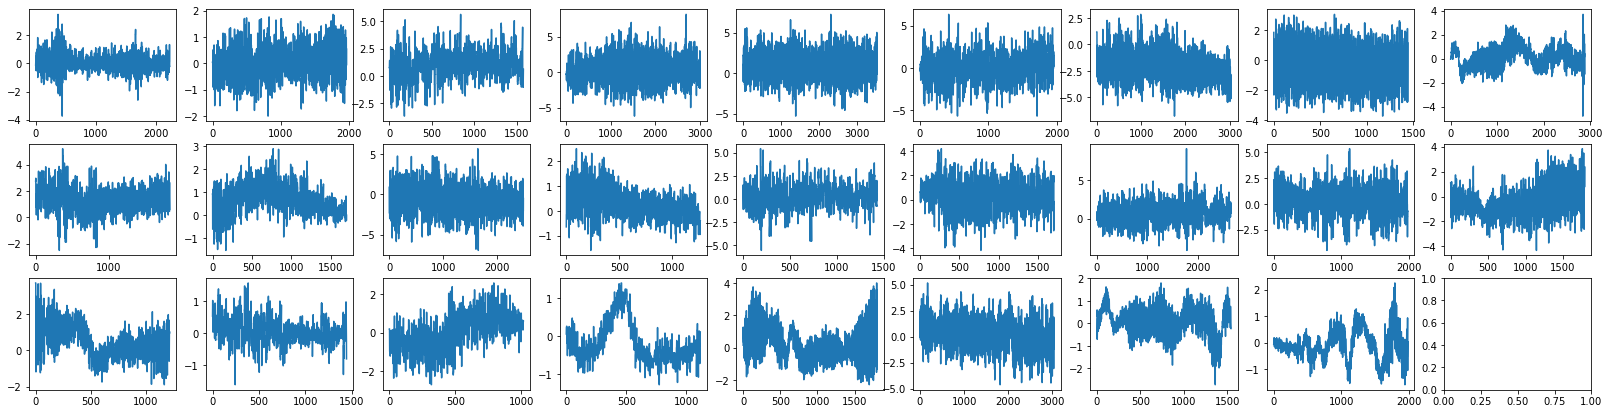

In [26]:
fig, ax = plt.subplots(3, 9, figsize=(28, 7))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==0:
        if j<=8:
            ax[0][j].plot(accel1_y[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1
        else:
            ax[1][j-9].plot(accel1_y[i])
            #ax[1][j-9].plot(giro1_x[i])
            #ax[1][j-9].plot(giro1_y[i])
            j=j+1  

for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==0:
        ax[1][j-9].plot(accel2_y[i])
        #ax[1][j-9].plot(giro2_x[i])
        #ax[1][j-9].plot(giro2_y[i])
        j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==0:
        if j<=17:
            ax[1][j-18].plot(accel3_y[i])
            #ax[1][j-18].plot(giro3_x[i])
            #ax[1][j-18].plot(giro3_y[i])
            j=j+1     
        else:
            ax[2][j-18].plot(accel3_y[i])
            #ax[2][j-18].plot(giro3_x[i])
            #ax[2][j-18].plot(giro3_y[i])
            j=j+1  


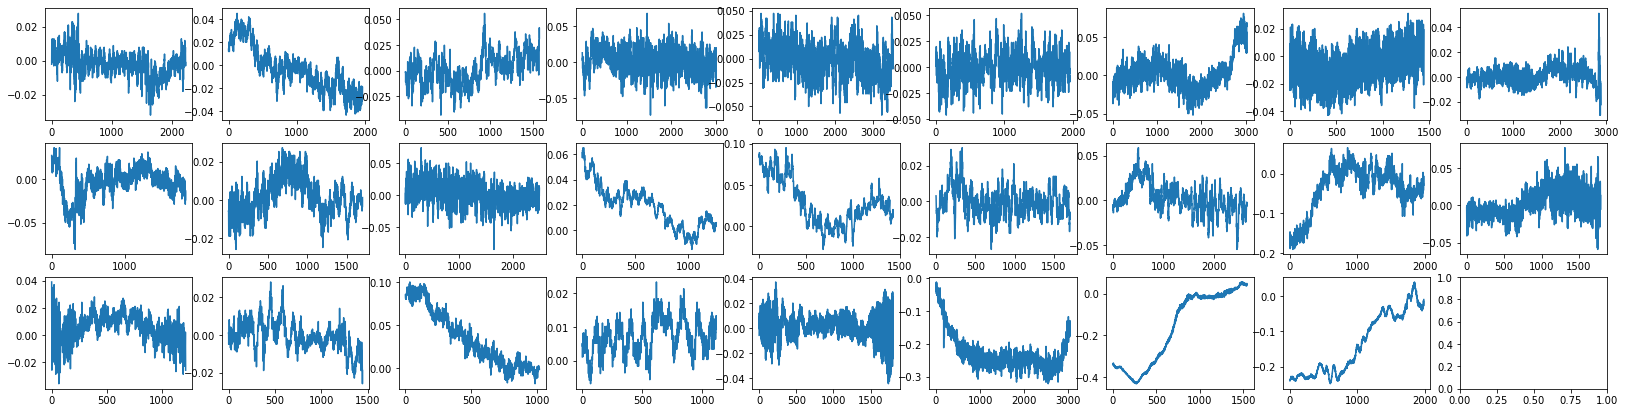

In [27]:
fig, ax = plt.subplots(3, 9, figsize=(28, 7))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==0:
        if j<=8:
            ax[0][j].plot(giro1_z[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1
        else:
            ax[1][j-9].plot(giro1_z[i])
            #ax[1][j-9].plot(giro1_x[i])
            #ax[1][j-9].plot(giro1_y[i])
            j=j+1  

for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==0:
        ax[1][j-9].plot(giro2_z[i])
        #ax[1][j-9].plot(giro2_x[i])
        #ax[1][j-9].plot(giro2_y[i])
        j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==0:
        if j<=17:
            ax[1][j-18].plot(giro3_z[i])
            #ax[1][j-18].plot(giro3_x[i])
            #ax[1][j-18].plot(giro3_y[i])
            j=j+1     
        else:
            ax[2][j-18].plot(giro3_z[i])
            #ax[2][j-18].plot(giro3_x[i])
            #ax[2][j-18].plot(giro3_y[i])
            j=j+1  


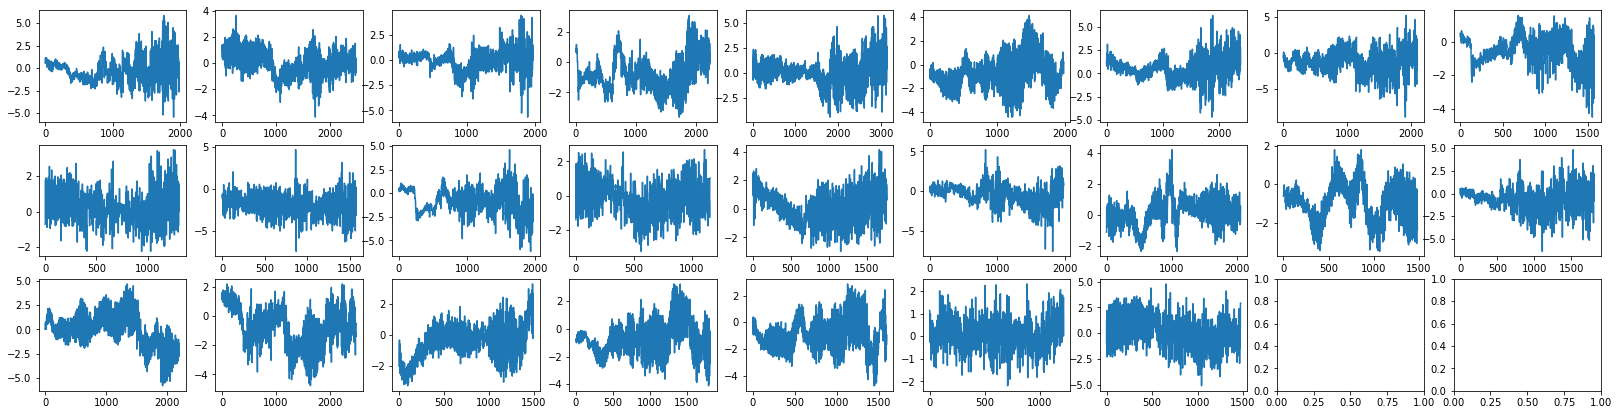

In [28]:
#11#8#6 = 25 curva agressiva a direita
fig, ax = plt.subplots(3, 9, figsize=(28, 7))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==1:
        if j<=8:
            ax[0][j].plot(accel1_y[i])
            #ax[0][j].plot(accel1_x[i])
            #ax[0][j].plot(accel1_z[i])
            j=j+1
        else:
            ax[1][j-9].plot(accel1_y[i])
            #ax[1][j-9].plot(accel1_x[i])
            #ax[1][j-9].plot(accel1_z[i])
            j=j+1  

for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==1:
        ax[1][j-9].plot(accel2_y[i])
        #ax[1][j-9].plot(accel2_x[i])
        #ax[1][j-9].plot(accel2_z[i])
        j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==1:
        if j<=17:
            ax[1][j-18].plot(accel3_y[i])
            #ax[1][j-18].plot(accel3_x[i])
            #ax[1][j-18].plot(accel3_z[i])
            j=j+1     
        else:
            ax[2][j-18].plot(accel3_y[i])
            #ax[2][j-18].plot(accel3_x[i])
            #ax[2][j-18].plot(accel3_z[i])
            j=j+1          

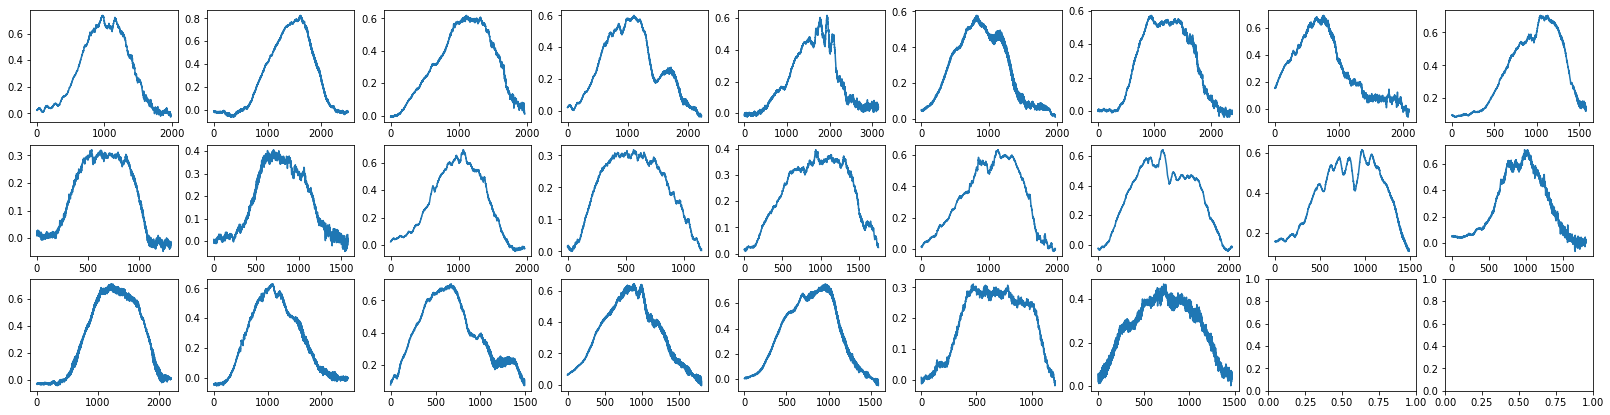

In [29]:
#11#8#6 = 25 curva agressiva a direita
fig, ax = plt.subplots(3, 9, figsize=(28, 7))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==1:
        if j<=8:
            ax[0][j].plot(giro1_z[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1
        else:
            ax[1][j-9].plot(giro1_z[i])
            #ax[1][j-9].plot(giro1_x[i])
            #ax[1][j-9].plot(giro1_y[i])
            j=j+1  

for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==1:
        ax[1][j-9].plot(giro2_z[i])
        #ax[1][j-9].plot(giro2_x[i])
        #ax[1][j-9].plot(giro2_y[i])
        j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==1:
        if j<=17:
            ax[1][j-18].plot(giro3_z[i])
            #ax[1][j-18].plot(giro3_x[i])
            #ax[1][j-18].plot(giro3_y[i])
            j=j+1     
        else:
            ax[2][j-18].plot(giro3_z[i])
            #ax[2][j-18].plot(giro3_x[i])
            #ax[2][j-18].plot(giro3_y[i])
            j=j+1  
         

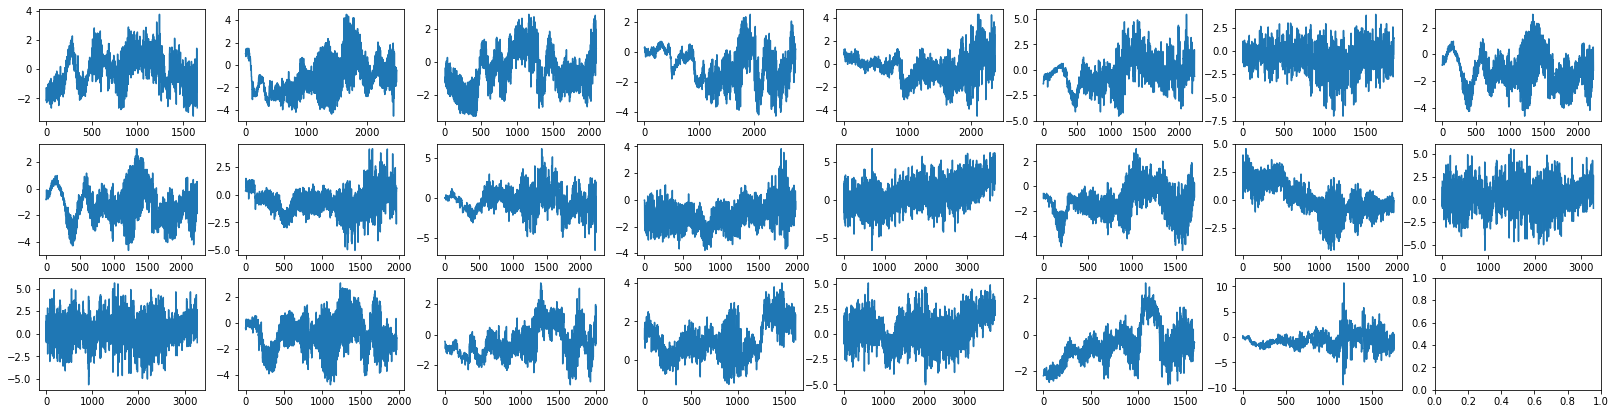

In [30]:
fig, ax = plt.subplots(3, 8, figsize=(28, 7))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==2:
        if j<=7:
            ax[0][j].plot(accel1_y[i])
            #ax[0][j].plot(accel1_x[i])
            #ax[0][j].plot(accel1_z[i])
            j=j+1
        if j>7 and j<=15:
            ax[1][j-8].plot(accel1_y[i])
            #ax[1][j-8].plot(accel1_x[i])
            #ax[1][j-8].plot(accel1_z[i])
            j=j+1  
        if j>=16 and j<=17:
            ax[2][j-16].plot(accel1_y[i])
            #ax[2][j-16].plot(accel1_x[i])
            #ax[2][j-16].plot(accel1_z[i])
            j=j+1  
        
for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==2:
        if j>17: 
            ax[2][j-16].plot(accel2_y[i])
            #ax[2][j-16].plot(accel2_x[i])
            #ax[2][j-16].plot(accel2_z[i])
            j=j+1    


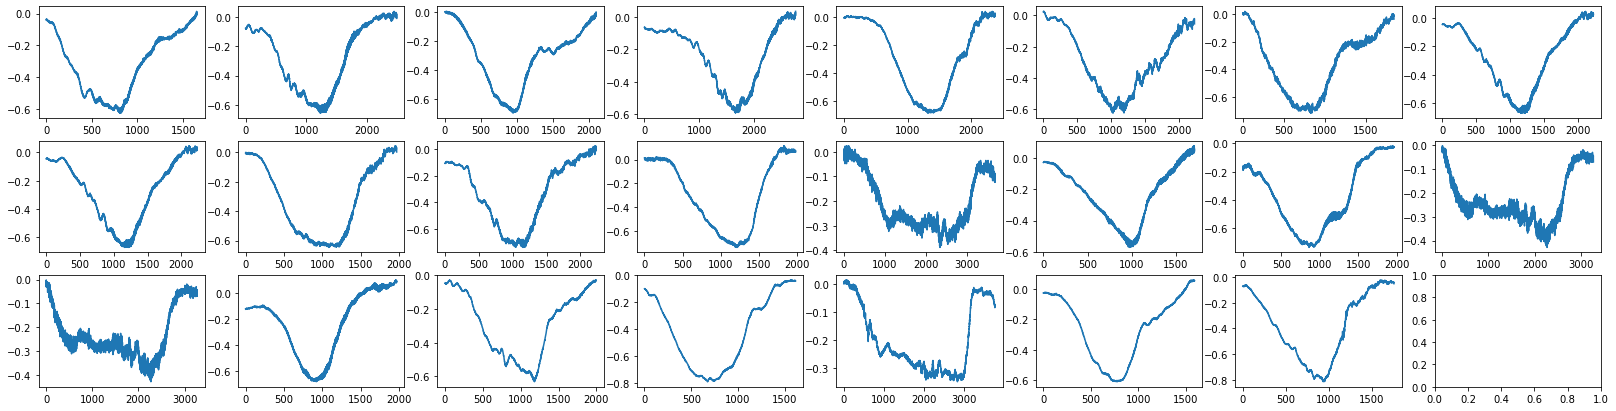

In [31]:
fig, ax = plt.subplots(3, 8, figsize=(28, 7))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==2:
        if j<=7:
            ax[0][j].plot(giro1_z[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1
        if j>7 and j<=15:
            ax[1][j-8].plot(giro1_z[i])
            #ax[1][j-8].plot(giro1_x[i])
            #ax[1][j-8].plot(giro1_y[i])
            j=j+1  
        if j>=16 and j<=17:
            ax[2][j-16].plot(giro1_z[i])
            #ax[2][j-16].plot(giro1_x[i])
            #ax[2][j-16].plot(giro1_y[i])
            j=j+1  
        
for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==2:
        if j>17: 
            ax[2][j-16].plot(giro2_z[i])
            #ax[2][j-16].plot(giro2_x[i])
            #ax[2][j-16].plot(giro2_y[i])
            j=j+1    
              

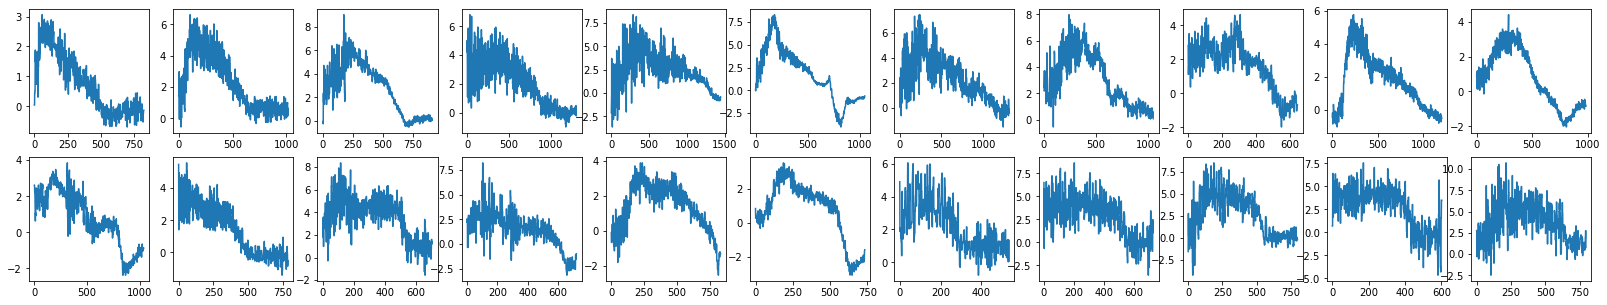

In [32]:
fig, ax = plt.subplots(2, 11, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==4:
        if j<=10:
            ax[0][j].plot(accel1_y[i])
            #ax[0][j].plot(accel1_y[i]*-1)
            #ax[0][j].plot(accel1_z[i]*-1)
            j=j+1
        else:
            ax[1][j-11].plot(accel1_y[i])
            #ax[1][j-11].plot(accel1_y[i]*-1)
            #ax[1][j-11].plot(accel1_z[i]*-1)
            j=j+1

for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==4:
            ax[1][j-11].plot(accel2_y[i])
            #ax[1][j-11].plot(accel2_y[i]*-1)
            #ax[1][j-11].plot(accel2_z[i]*-1)
            j=j+1               

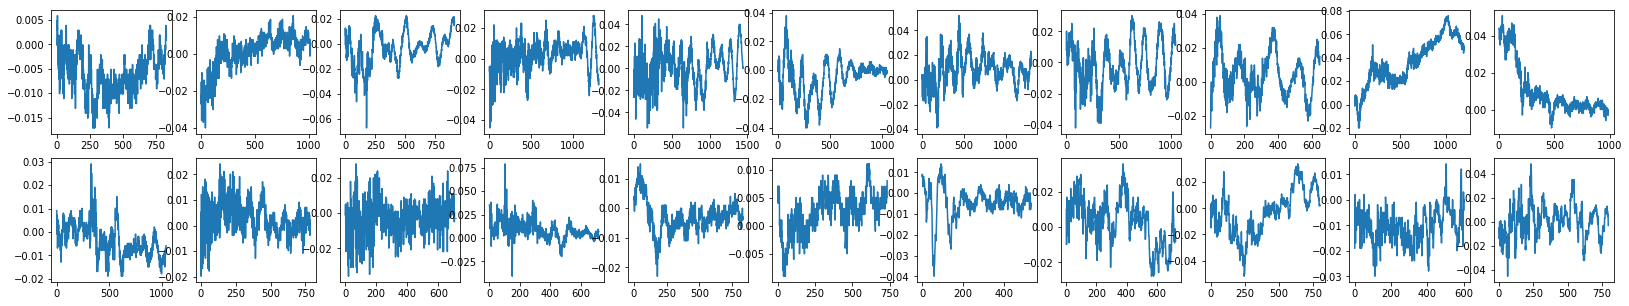

In [33]:
fig, ax = plt.subplots(2, 11, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==4:
        if j<=10:
            ax[0][j].plot(giro1_z[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1
        else:
            ax[1][j-11].plot(giro1_z[i])
            #ax[1][j-11].plot(giro1_x[i])
            #ax[1][j-11].plot(giro1_y[i])
            j=j+1
            
for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==4:
            ax[1][j-11].plot(giro2_z[i])
            #ax[1][j-11].plot(giro2_x[i])
            #ax[1][j-11].plot(giro2_y[i])
            j=j+1              

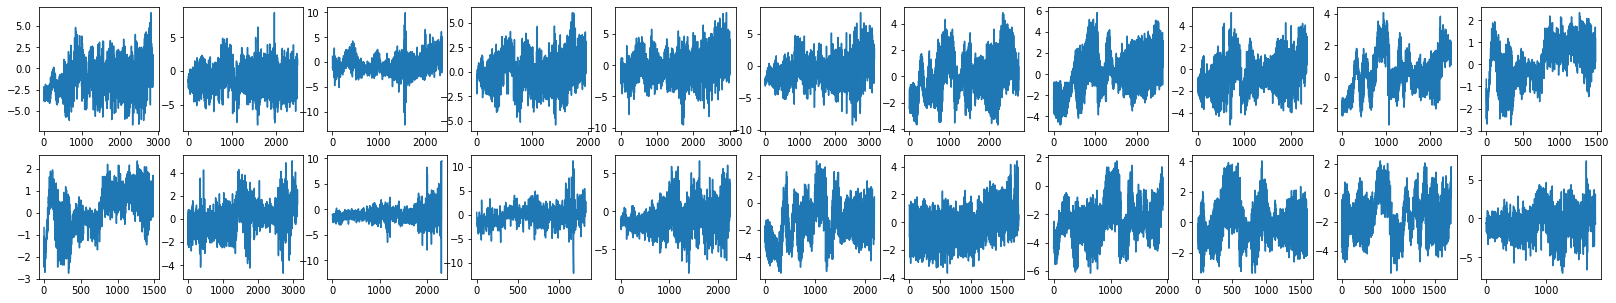

In [34]:
#9#6#6 = 21 aceleração agressiva
fig, ax = plt.subplots(2, 11, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==5:
        if j<=8:
            ax[0][j].plot(accel1_y[i])
            #ax[0][j].plot(accel1_y[i]*-1)
            #ax[0][j].plot(accel1_z[i]*-1)
            j=j+1
            
for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==5:
         if j>=9 and j<=10:
            ax[0][j].plot(accel2_y[i])
            #ax[0][j].plot(accel2_y[i]*-1)
            #ax[0][j].plot(accel2_z[i]*-1)
            j=j+1
         if j>10:
            ax[1][j-11].plot(accel2_y[i])
            #ax[1][j-11].plot(accel2_y[i]*-1)
            #ax[1][j-11].plot(accel2_z[i]*-1)
            j=j+1  
            
for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==5:
         if j>14:
            ax[1][j-11].plot(accel3_y[i])
            #ax[1][j-11].plot(accel3_y[i]*-1)
            #ax[1][j-11].plot(accel3_z[i]*-1)
            j=j+1               
  

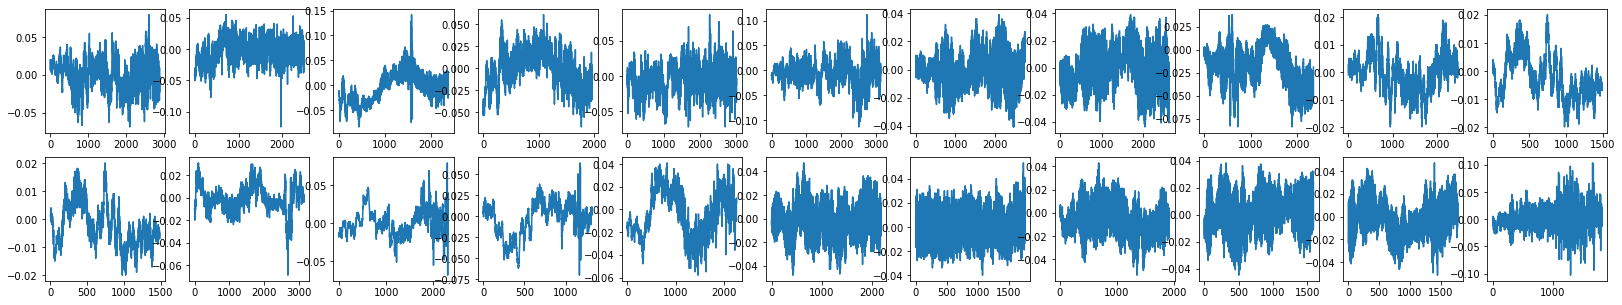

In [35]:
#9#6#6 = 21 aceleração agressiva
fig, ax = plt.subplots(2, 11, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==5:
        if j<=8:
            ax[0][j].plot(giro1_z[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1
            
for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==5:
         if j>=9 and j<=10:
            ax[0][j].plot(giro2_z[i])
            #ax[0][j].plot(giro2_x[i])
            #ax[0][j].plot(giro2_y[i])
            j=j+1
         if j>10:
            ax[1][j-11].plot(giro2_z[i])
            #ax[1][j-11].plot(giro2_x[i])
            #ax[1][j-11].plot(giro2_y[i])
            j=j+1  
            
for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==5:
         if j>14:
            ax[1][j-11].plot(giro3_z[i])
            #ax[1][j-11].plot(giro3_x[i])
            #ax[1][j-11].plot(giro3_y[i])
            j=j+1               
  

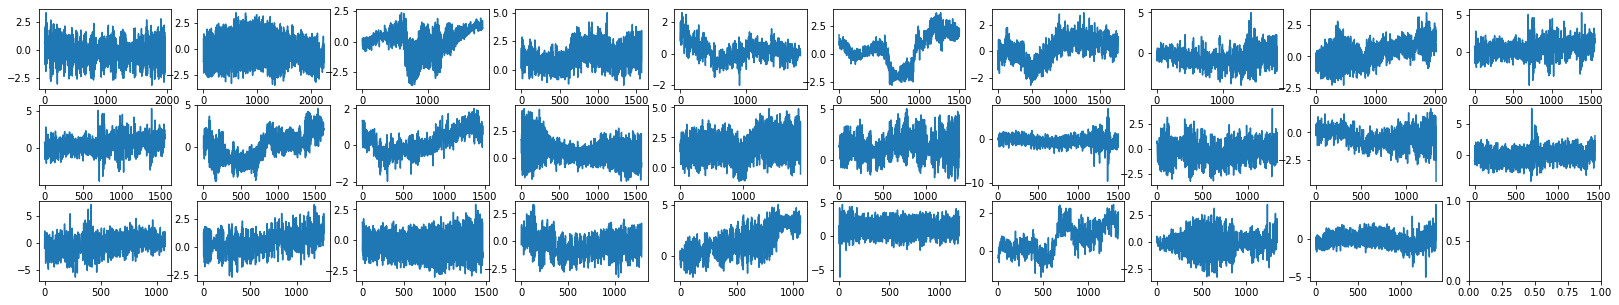

In [36]:
#5#6#18 = 29 troca de faixa a direita
fig, ax = plt.subplots(3, 10, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==3:
        if j<=4:
            ax[0][j].plot(accel1_y[i])
            #ax[0][j].plot(accel1_x[i])
            #ax[0][j].plot(accel1_z[i])
            j=j+1

for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==3:
         if j>4 and j<=9:
            ax[0][j].plot(accel2_y[i])
            #ax[0][j].plot(accel2_x[i])
            #ax[0][j].plot(accel2_z[i])
            j=j+1
         if j==10:
            ax[1][j-10].plot(accel2_y[i])
            #ax[1][j-10].plot(accel2_x[i])
            #ax[1][j-10].plot(accel2_z[i])
            j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==3:
         if j>10 and j<=19:
            ax[1][j-10].plot(accel3_y[i])
            #ax[1][j-10].plot(accel3_x[i])
            #ax[1][j-10].plot(accel3_z[i])
            j=j+1
         else:
            ax[2][j-20].plot(accel3_y[i])
            #ax[2][j-20].plot(accel3_x[i])
            #ax[2][j-20].plot(accel3_z[i])
            j=j+1

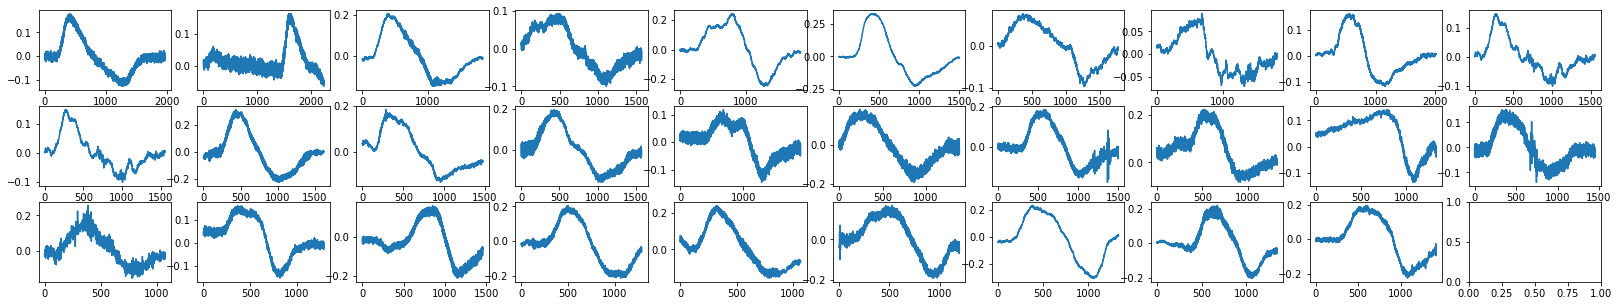

In [37]:
#5#6#18 = 29 troca de faixa a direita
fig, ax = plt.subplots(3, 10, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==3:
        if j<=4:
            ax[0][j].plot(giro1_z[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1

for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==3:
         if j>4 and j<=9:
            ax[0][j].plot(giro2_z[i])
            #ax[0][j].plot(giro2_x[i])
            #ax[0][j].plot(giro2_y[i])
            j=j+1
         if j==10:
            ax[1][j-10].plot(giro2_z[i])
            #ax[1][j-10].plot(giro2_x[i])
            #ax[1][j-10].plot(giro2_y[i])
            j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==3:
         if j>10 and j<=19:
            ax[1][j-10].plot(giro3_z[i])
            #ax[1][j-10].plot(giro3_x[i])
            #ax[1][j-10].plot(giro3_y[i])
            j=j+1
         else:
            ax[2][j-20].plot(giro3_z[i])
            #ax[2][j-20].plot(giro3_x[i])
            #ax[2][j-20].plot(giro3_y[i])
            j=j+1       

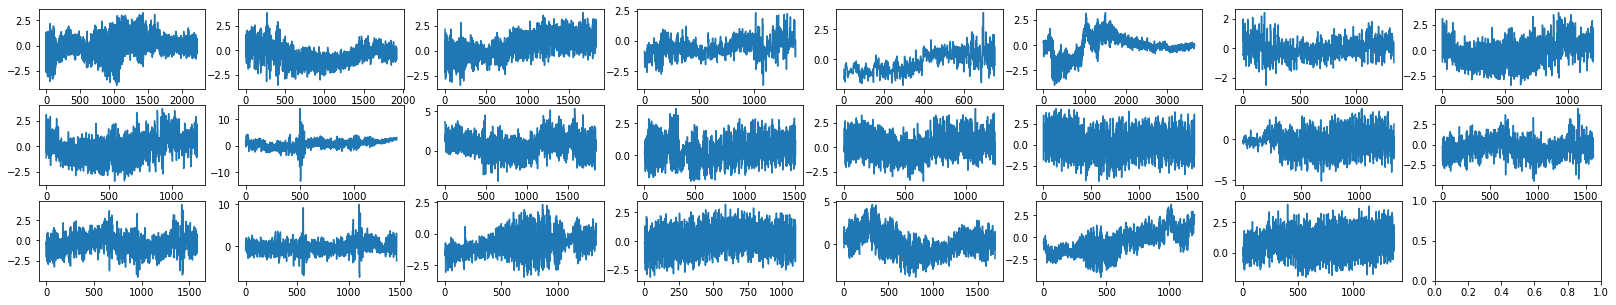

In [38]:
#3#4#16 = 23 troca de faixa a esquerda
fig, ax = plt.subplots(3, 8, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==6:
        if j<=2:
            ax[0][j].plot(accel1_y[i])
            #ax[0][j].plot(accel1_x[i])
            #ax[0][j].plot(accel1_z[i])
            j=j+1
for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==6:
         if j>2 and j<=6:
            ax[0][j].plot(accel2_y[i])
            #ax[0][j].plot(accel2_x[i])
            #ax[0][j].plot(accel2_z[i])
            j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==6:
         if j==7:
            ax[0][j].plot(accel3_y[i])
            #ax[0][j].plot(accel3_x[i])
            #ax[0][j].plot(accel3_z[i])
            j=j+1
         if j>7 and j<=15:
            ax[1][j-8].plot(accel3_y[i])
            #ax[1][j-8].plot(accel3_z[i])
            #ax[1][j-8].plot(accel3_z[i])
            j=j+1
         if j>15 and j<=22:
            ax[2][j-16].plot(accel3_y[i])
            #ax[2][j-16].plot(accel3_x[i])
            #ax[2][j-16].plot(accel3_z[i])
            j=j+1     


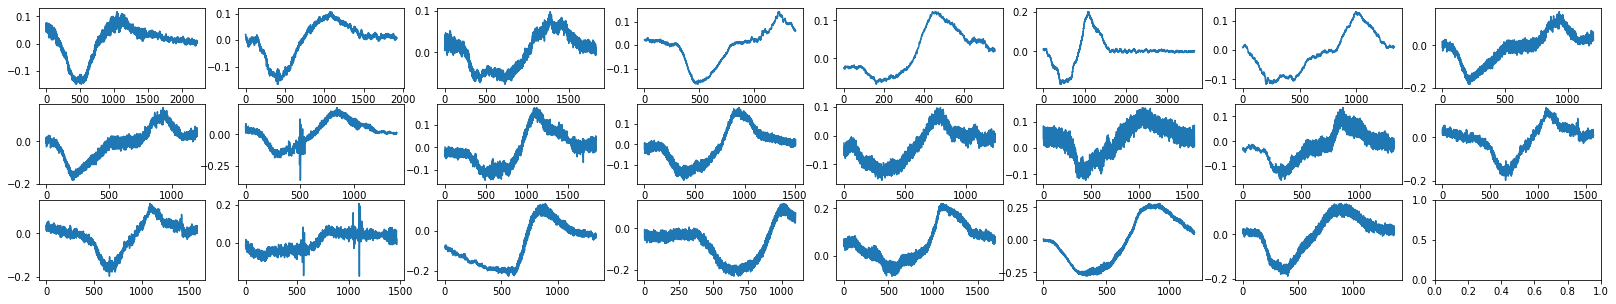

In [39]:
#3#4#16 = 23 troca de faixa a esquerda
fig, ax = plt.subplots(3, 8, figsize=(28, 5))
j=0
for i in np.arange(0,length1):
    if data_rotulos['target'][i]==6:
        if j<=2:
            ax[0][j].plot(giro1_z[i])
            #ax[0][j].plot(giro1_x[i])
            #ax[0][j].plot(giro1_y[i])
            j=j+1
for i in np.arange(0,length2):
    if data_rotulos2['target'][i]==6:
         if j>2 and j<=6:
            ax[0][j].plot(giro2_z[i])
            #ax[0][j].plot(giro2_x[i])
            #ax[0][j].plot(giro2_y[i])
            j=j+1

for i in np.arange(0,length3):
    if data_rotulos3['target'][i]==6:
         if j==7:
            ax[0][j].plot(giro3_z[i])
            #ax[0][j].plot(giro3_x[i])
            #ax[0][j].plot(giro3_y[i])
            j=j+1
         if j>7 and j<=15:
            ax[1][j-8].plot(giro3_z[i])
            #ax[1][j-8].plot(giro3_x[i])
            #ax[1][j-8].plot(giro3_y[i])
            j=j+1
         if j>15 and j<=22:
            ax[2][j-16].plot(giro3_z[i])
            #ax[2][j-16].plot(giro3_x[i])
            #ax[2][j-16].plot(giro3_y[i])
            j=j+1     
                

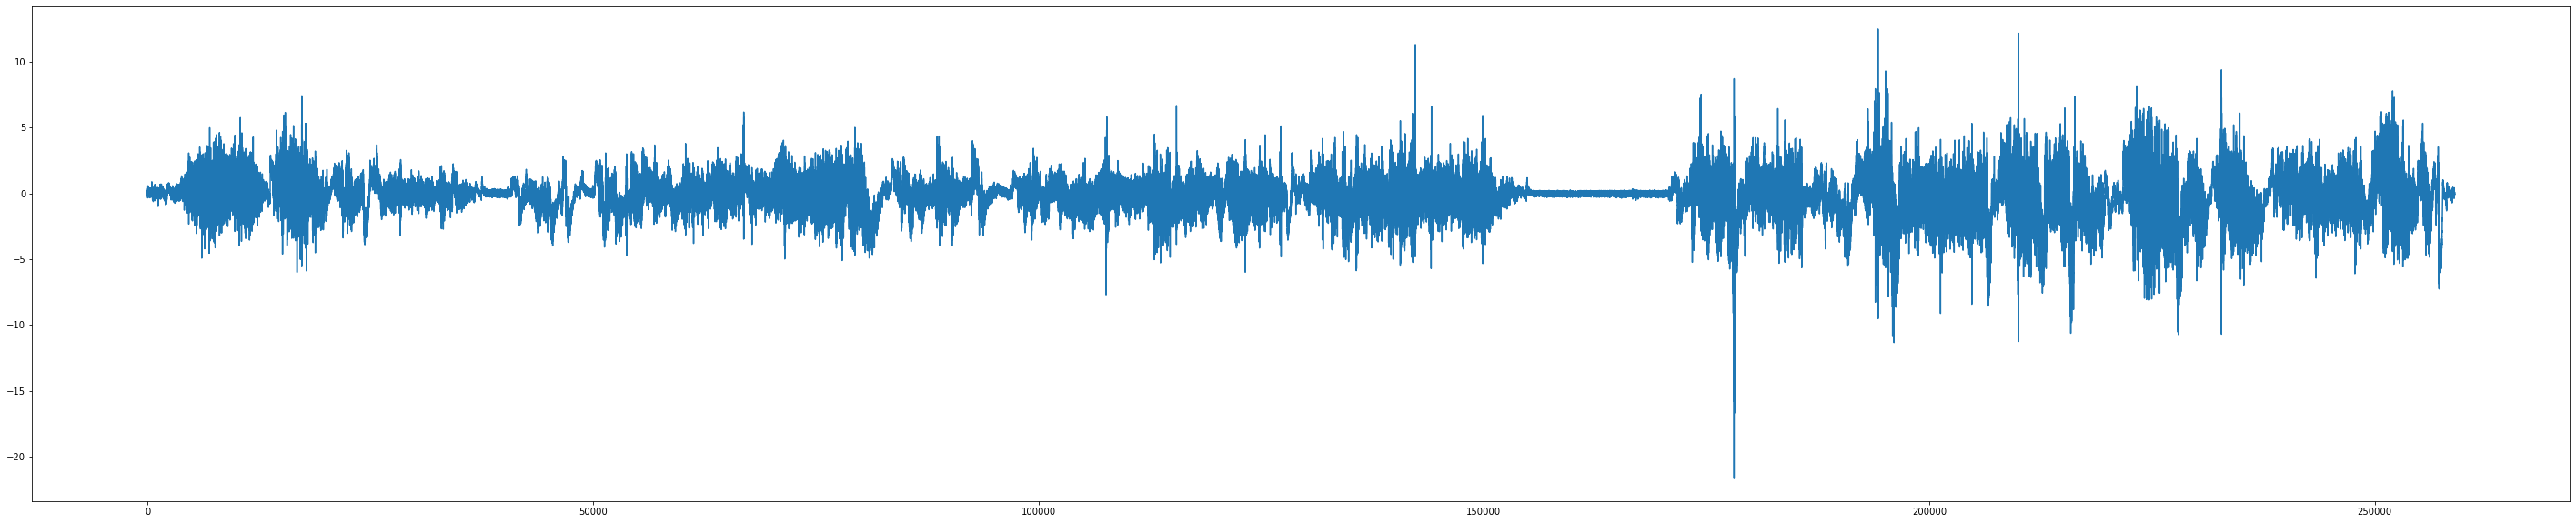

In [40]:
plt.figure(figsize=(50,10))
plt.plot(data_acel2['Linear Acceleration x (m/s^2)'])

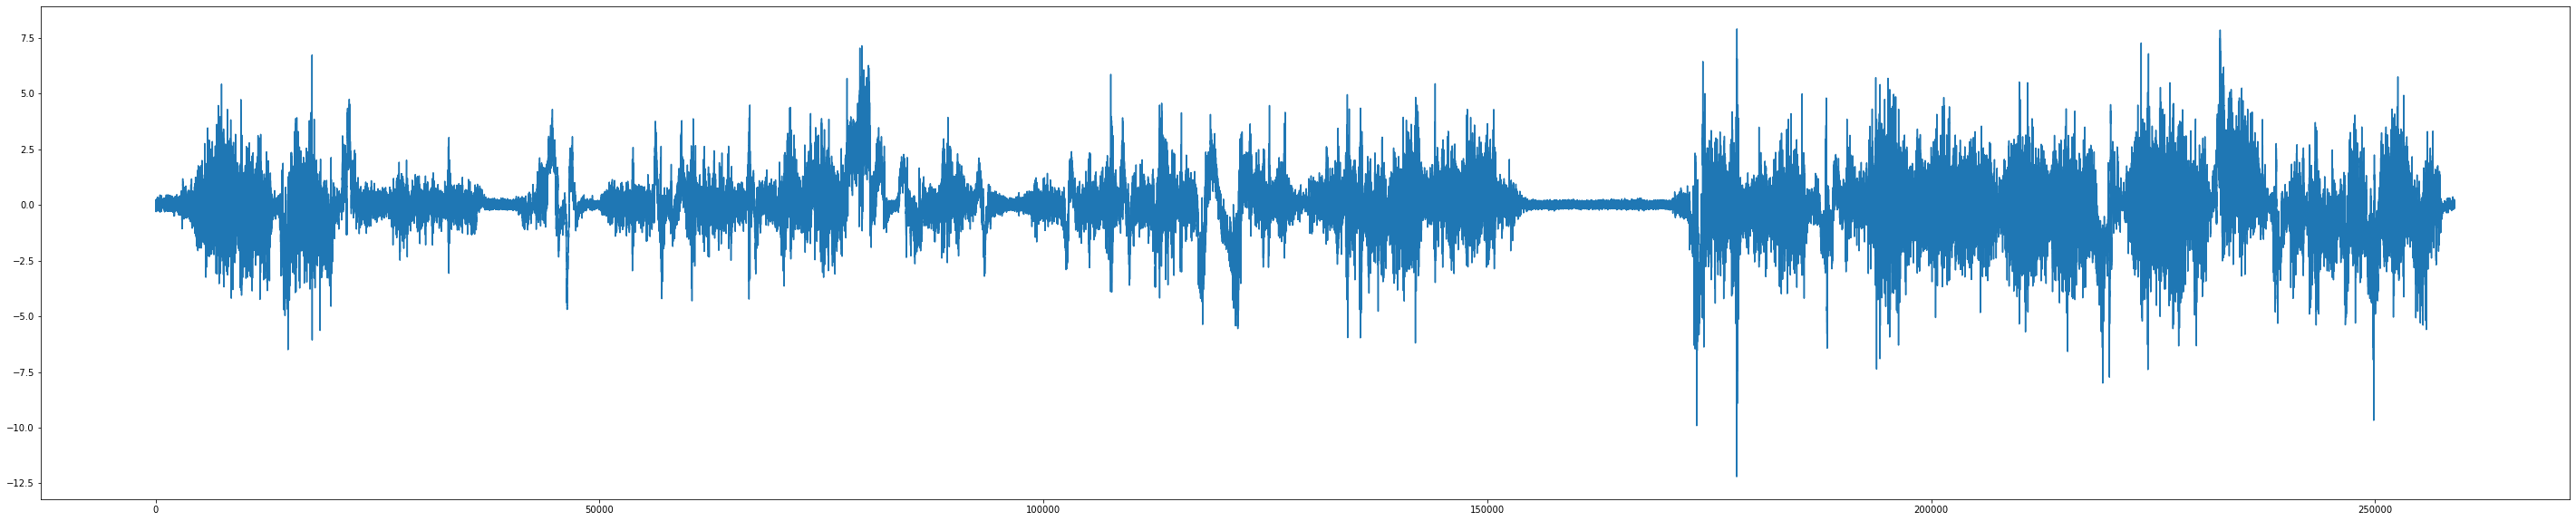

In [41]:
plt.figure(figsize=(50,10))
plt.plot(data_acel2['Linear Acceleration y (m/s^2)'])

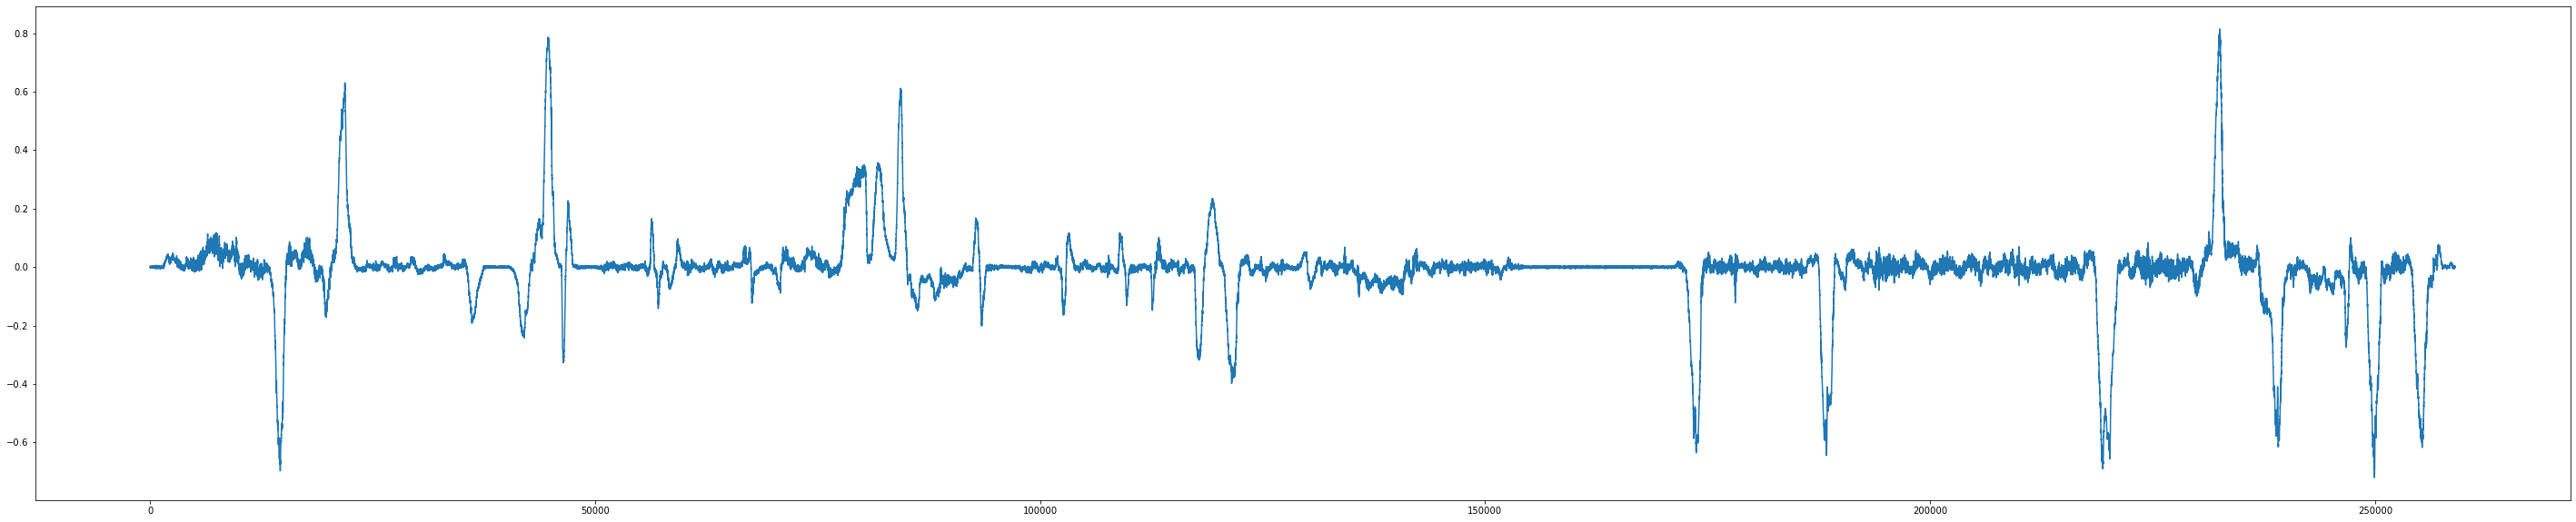

In [42]:
plt.figure(figsize=(50,10))
plt.plot(data_velang2['Gyroscope z (rad/s)'])